# 目录

- [数据准备](#数据准备)
- [描述性统计](#描述性统计)
- [可视化分析](#可视化分析)
    - [歌曲时长分布情况](#歌曲时长分布情况)
    - [歌曲数量排名前10的歌手](#歌曲数量排名前10的歌手)
    - [排名和时长的分布情况](#排名和时长的分布情况)
    - [排名区间内的前十歌手分布](#排名区间内的前十歌手分布)
    - [各歌手歌曲时长分布情况(前10位)](#各歌手歌曲时长分布情况(前10位))
    - [歌曲词云图](#歌曲词云图)

# 数据准备

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['simhei']
mpl.rcParams['axes.unicode_minus'] = False  

In [28]:
df = pd.read_excel('酷狗音乐Top500排行榜.xlsx')
df

,排名,歌手,歌曲,时长
0,1,陈奕迅,孤独患者,4:33
1,2,任夏,秋风经过,3:48
2,3,卢润泽,土坡上的狗尾草,3:16
3,4,ROSÉ、Bruno Mars,APT.,2:49
4,5,庄心妍,有爱就不怕,4:33
...,...,...,...,...
495,496,Hi Noise,We Never,4:08
496,497,影子,其实好多苦不敢对谁讲,2:48
497,498,王樾安,会开花的云,3:31
498,499,比莉,Dear John,5:11


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   排名      500 non-null    int64 
 1   歌手      500 non-null    object
 2   歌曲      500 non-null    object
 3   时长      500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


# 描述性统计

In [30]:
df.describe()

,排名
count,500.000000
mean,250.500000
std,144.481833
min,1.000000
25%,125.750000
50%,250.500000
75%,375.250000
max,500.000000


# 可视化分析

## 歌曲时长分布情况

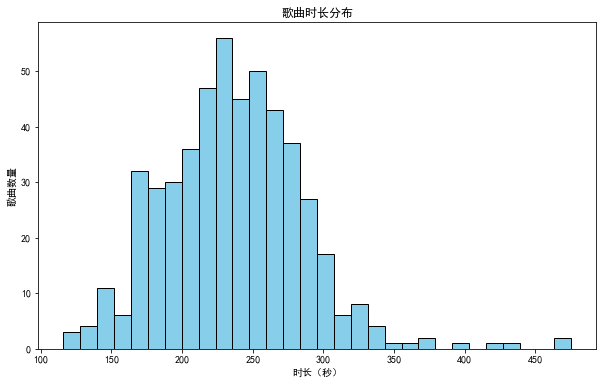

In [31]:
plt.figure(figsize=(10, 6))
df['时长'] = df['时长'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))  
plt.hist(df['时长'], bins=30, color='skyblue', edgecolor='black')
plt.title('歌曲时长分布')
plt.xlabel('时长（秒）')
plt.ylabel('歌曲数量')
plt.show()

## 歌曲数量排名前10的歌手

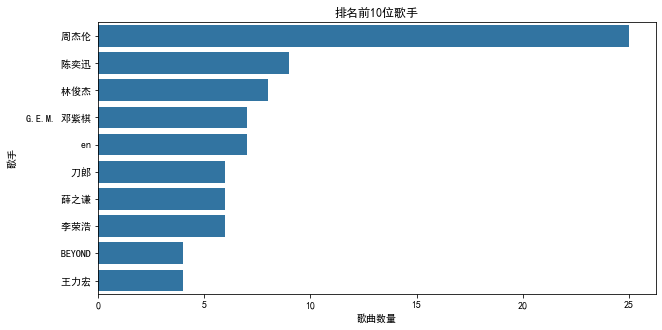

In [32]:
plt.figure(figsize=(10, 5))
top_artists = df['歌手'].value_counts().head(10)
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('排名前10位歌手')
plt.xlabel('歌曲数量')
plt.ylabel('歌手')
plt.show()

## 排名和时长的分布情况

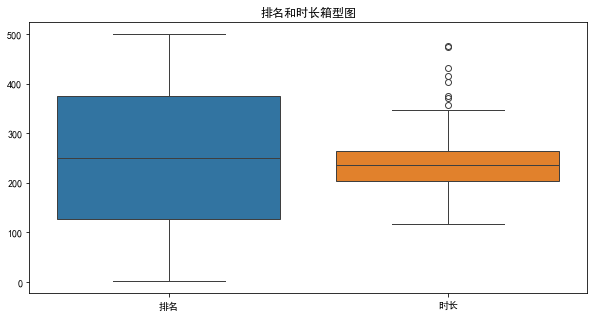

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['排名', '时长']])
plt.title('排名和时长箱型图')
plt.show()

## 排名区间内的前十歌手分布

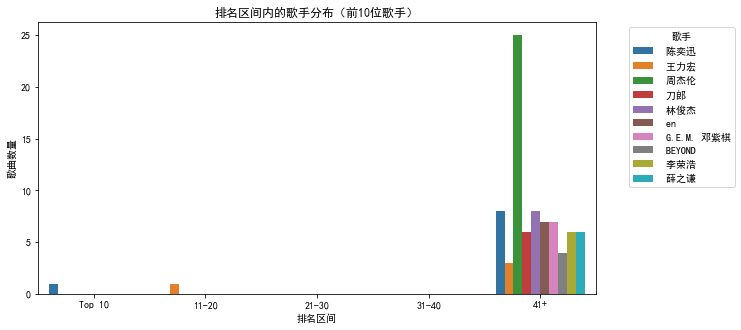

In [34]:
df['Rank Group'] = pd.cut(df['排名'], bins=[0, 10, 20, 30, 40, 500], labels=['Top 10', '11-20', '21-30', '31-40', '41+'])

top_artists = df['歌手'].value_counts().head(10)
df_top_artists = df[df['歌手'].isin(top_artists.index)]

plt.figure(figsize=(10, 5))
sns.countplot(x='Rank Group', hue='歌手', data=df_top_artists)
plt.title('排名区间内的歌手分布（前10位歌手）')
plt.xlabel('排名区间')
plt.ylabel('歌曲数量')
plt.legend(title='歌手', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

## 各歌手歌曲时长分布情况(前10位)

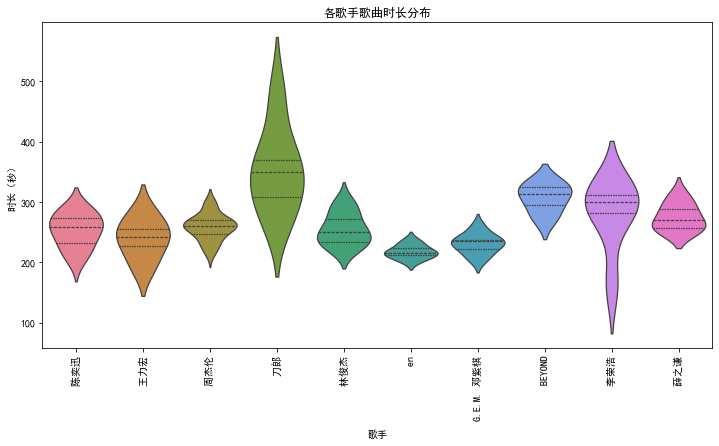

In [35]:
top_artists = df['歌手'].value_counts().head(10).index
filtered_df = df[df['歌手'].isin(top_artists)]
palette_colors = sns.color_palette('husl', len(top_artists))
plt.figure(figsize=(12, 6))
sns.violinplot(
    x='歌手', 
    y='时长', 
    data=filtered_df, 
    inner="quartile",
    hue='歌手',  
    palette=palette_colors,  
    legend=False  
)
plt.title('各歌手歌曲时长分布')
plt.xlabel('歌手')
plt.ylabel('时长（秒）')
plt.xticks(rotation=90)
plt.show()

## 歌曲词云图

In [42]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image
font_path =r'C:/Windows/Fonts/msyh.ttc'
song_names = df['歌曲'].tolist()
text = ' '.join(song_names)
font_path = 'simhei.ttf'  
wordcloud = WordCloud(
    font_path=font_path,  
    background_color='white',
    width=800,
    height=400
).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

ValueError: Only supported for TrueType fonts